<img src="UNFC_COVER.jpg" alt="UNFC">

# Module 5: Linear Integer Programming

## Import Libraries

In [9]:
#!pip install pandas
#!pip install matplotlib
#!pip install numpy
#!pip install seaborn
#!pip install ortools

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from ortools.init.python import init
from ortools.linear_solver import pywraplp

## LP Exercises

### Juice Bar Optimization

A juice bar sells two products:

- Tropical Juice (T)

- Berry Juice (B)

Each type of juice requires fruits and bottling time, and the bar has limited resources each day.

| Resource              | Tropical Juice (T) | Berry Juice (B)	| Availability per day |
| :------:              | :----------------: | :-----------:	| :------------------: |
| Fruits (kg)           | 2 kg               | 1 kg	            | 100 kg               |
| Bottling Time (min)	| 3 min	             | 2 min	        | 120 min              |
| Profit per unit	    | $3	             | $2	            | —                    |

Write a code to take all current information and maximize the total profit. What would happen if the Juice bar could make the tropical Juice botling tim 1 minute faster?

#### Answer:

Python Code Using OR-Tools (MIP):

- Formulation

    $$
    \text{x = units of Tropical Juice (T)} \\ \
    \text{y = units of Berry Juice (B)}\\ \
    $$

- Objective Function:
    
    $$
    \text{Maximize:}~Z = 3x + 2y
    $$

- Subject to Constraints:
    $$
    \text{Fruit constraint:}~2x + 1y ≤ 100       \\ \
    \text{Bottling time constraint:}~3x + 2y ≤ 120       \\ \
    \text{Non-negativity:}~x ≥ 0, y ≥ 0        \\ \
    $$

In [11]:
def solve_juice_bar(Fruit_constraint, Bottling_time_constraint, Objective_function):
    # Create the linear solver with the GLOP backend (for LP problems)
    solver = pywraplp.Solver.CreateSolver('GLOP')

    if not solver:
        print("Solver not created.")
        return

    # Decision variables
    x = solver.NumVar(0, solver.infinity(), 'Tropical Juice (x)')
    y = solver.NumVar(0, solver.infinity(), 'Berry Juice (y)')

    # Constraints
    solver.Add(Fruit_constraint[0] * x + Fruit_constraint[1] * y <= Fruit_constraint[2])  # Fruit constraint
    solver.Add(Bottling_time_constraint[0] * x + Bottling_time_constraint[1] * y <= Bottling_time_constraint[2])  # Bottling time constraint

    # Objective function: Maximize 3x + 2y
    solver.Maximize(Objective_function[0] * x + Objective_function[1] * y)

    # Solve the problem
    status = solver.Solve()

    # Output the results
    if status == pywraplp.Solver.OPTIMAL:
        print("Solution Found:")
        print(f"\t Tropical Juice (x): {round(x.solution_value(), 2)}")
        print(f"\t Berry Juice (y): {round(y.solution_value(), 2)}")
        print(f"\t Maximum Profit: ${solver.Objective().Value()}")
    else:
        print("No optimal solution found.")

    x = np.arange(0.0, 100, 1)
    y_f = (Fruit_constraint[2] - Fruit_constraint[0] * x) / Fruit_constraint[1]
    y_b = (Bottling_time_constraint[2] - Bottling_time_constraint[0] * x) / Bottling_time_constraint[1]
    y_Z = (solver.Objective().Value() - Objective_function[0] * x) / Objective_function[1]
    
    fig, ax = plt.subplots()
    ax.plot(x, y_f, color = 'b', label = 'Fruit constraint')
    ax.plot(x, y_b, color = 'r', label = 'Bottling time constraint')
    ax.plot(x, y_Z, color = 'g', label = 'Maximum Profit')

    ax.set(
        xlabel = 'Tropical Juice', 
        ylabel = 'Berry Juice',
        title = 'Juice Bar Optimization'
        )
    ax.grid()


    plt.xticks(np.arange(0, 55, step = 5.0))
    plt.yticks(np.arange(0, 55, step = 5.0))
    plt.xlim(0, 50)
    plt.ylim(0, 50)
    plt.legend()
    plt.show()

Solution Found:
	 Tropical Juice (x): 0.0
	 Berry Juice (y): 60.0
	 Maximum Profit: $120.0


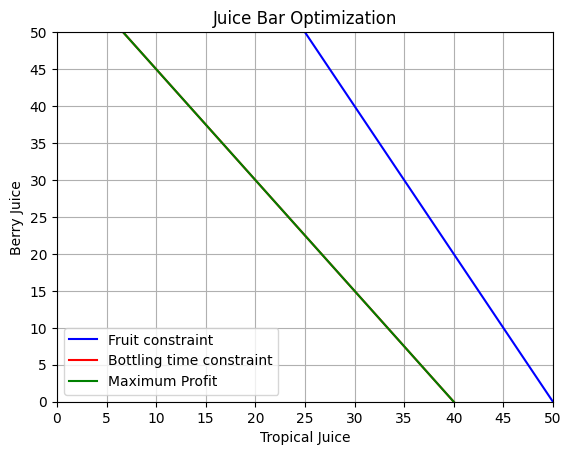

In [12]:
# Run the solver
solve_juice_bar(
    Fruit_constraint = [2, 1, 100], 
    Bottling_time_constraint = [3, 2, 120], 
    Objective_function = [3, 2]
    )

What would happen if the Juice bar could make the tropical Juice botling tim 1 minute faster?

Solution Found:
	 Tropical Juice (x): 40.0
	 Berry Juice (y): 20.0
	 Maximum Profit: $160.0


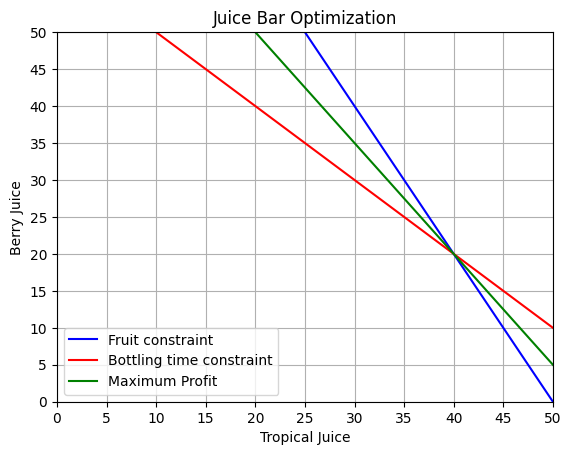

In [13]:
# Run the solver
solve_juice_bar(
    Fruit_constraint = [2, 1, 100], 
    Bottling_time_constraint = [2, 2, 120], 
    Objective_function = [3, 2]
    )

## MIP Exercise

### Facility Selection and Production Planning

A company is considering opening up to 2 out of 3 factories to produce a specific car part. Each factory has a fixed cost if opened and variable production cost per unit. The goal is to meet customer demand at minimum total cost.

| Factory| Fixed Cost ($)| Variable Cost per Unit ($)| Capacity (units) |
| :-----:| :------------:| :------------------------:| :--------------: |
|    A   |    10,000     |             5             |       100        |
|    B   |    8,000      |             6             |       120        |
|    C   |    12,000     |             4             |       90         |        


- Demand: 180 units
- Constraint: You can open at most 2 factories

Write a code to take all current information and minimize the cost of production. What would happen if we the company dould reduced the Fixed Cost of Factory C by $20\%$?

#### Answer:

Python Code Using OR-Tools (MIP): 

- Formulation

    $$
    x_{A}, x_{B}, x_{C} \text{= number of units produced at factories A, B, C}\\ \
    y_{A}, y_{B}, y_{C} \in \{0, 1\} = \text{binary variables indicating whether a factory is open}
    $$

- Objective Function:
- 
    $$
    \text{Minimize:}~C = 10000 𝑦_{A} + 8000 𝑦_{B} + 12000 𝑦_{C} + 5 x_{A} + 6 x_{B} + 4 x_{C}
    $$

- Subject to Constraints:

    $$
    \text{Demand:}~x_{A}, x_{B}, x_{C} = 180 \\ \
    \text{Production allowed only if factory is open:}~x_{A} ≤ 100 y_{A}, x_{B} ≤ 120 y_{B}, x_{C} ≤ 90 y_{C} \\ \
    \text{Open at most 2 factories:}~y_{A} + y_{B} + y_{C} \le 2 \\ \
    x_{A}, x_{B}, x_{C} \ge 0 \\ \
    y_{A}, y_{B}, y_{C} \in \{0, 1\}
    $$

In [14]:
#from ortools.linear_solver import pywraplp

def mip_factory_selection(fixed_cost, variable_cost, capacity, demand):
    solver = pywraplp.Solver.CreateSolver("SCIP")
    if not solver:
        print("Solver not created.")
        return

    num_factories = 3
    # Variables
    x = [solver.NumVar(0, capacity[i], f'x{i}') for i in range(num_factories)]
    y = [solver.IntVar(0, 1, f'y{i}') for i in range(num_factories)]

    # Objective function: fixed + variable cost
    solver.Minimize(solver.Sum(fixed_cost[i] * y[i] + variable_cost[i] * x[i] for i in range(num_factories)))

    # Demand constraint
    solver.Add(solver.Sum(x) == demand)

    # Linking x to y
    for i in range(num_factories):
        solver.Add(x[i] <= capacity[i] * y[i])

    # At most 2 factories can be opened
    solver.Add(solver.Sum(y) <= 2)

    # Solve it
    status = solver.Solve()

    # Output
    if status == pywraplp.Solver.OPTIMAL:
        print("Optimal solution found:")
        total_cost = solver.Objective().Value()
        print(f"Total cost: ${total_cost:.2f}")
        for i in range(num_factories):
            print(f"Factory {chr(65+i)}: Open = {int(y[i].solution_value())}, Units = {round(x[i].solution_value(), 2)}")
    else:
        print("No optimal solution found.")


In [15]:
# Run it
mip_factory_selection(
    fixed_cost = [10000, 8000, 12000],
    variable_cost = [5, 6, 4],
    capacity = [100, 120, 90],
    demand = 180
    )

Optimal solution found:
Total cost: $18980.00
Factory A: Open = 1, Units = 100.0
Factory B: Open = 1, Units = 80.0
Factory C: Open = 0, Units = 0.0


What would happen if we the company dould reduced the Fixed Cost of Factory C by $20\%$?

In [16]:
# Run it
mip_factory_selection(
    fixed_cost = [10000, 8000, 12000.0 * 0.80],
    variable_cost = [5, 6, 4],
    capacity = [100, 120, 90],
    demand = 180,
    )

Optimal solution found:
Total cost: $18500.00
Factory A: Open = 0, Units = 0.0
Factory B: Open = 1, Units = 90.0
Factory C: Open = 1, Units = 90.0
